In [1]:
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.utils import img_to_array, load_img
from shutil import copyfile
from PIL import Image
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Membuat direktori untuk menempatka data yang akan digunakan

root_dir = '/kaggle/working/Dataset'
resized_dir = '/kaggle/working/Resized_Dataset'
source_dir = '/kaggle/input/wisata-semarangan/Dataset'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)
  shutil.rmtree(resized_dir)

def create_train_test_dirs(root_path, resized_path):
  os.mkdir(root_path)
  os.mkdir(resized_path)
  os.mkdir(os.path.join(root_path, 'training'))
  os.mkdir(os.path.join(root_path, 'testing'))

  for foldername in os.listdir(source_dir):
    for i in os.listdir(root_path):
      os.mkdir(os.path.join(root_path, i, foldername))
    
    os.mkdir(os.path.join(resized_path, foldername))

try:
  create_train_test_dirs(root_path=root_dir, resized_path=resized_dir)
except FileExistsError:
  print("File Sudah Ada")

In [3]:
# Resized gambar agar memiliku jumlah pixel yang sama
def resize_dataset(path, new_path, new_size):
  for filename in os.scandir(path):
    img = Image.open(os.path.join(path, filename.name))
    img_resized= img.resize(new_size)
    img_resized.save(os.path.join(new_path, filename.name))

In [4]:
# Membuat fungsi untuk menyalin data dari sumber data ke train dan test dir seusai yang diinginkan

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  all_files = []
    
  for file_name in os.listdir(SOURCE_DIR):
      file_path = SOURCE_DIR + file_name

      if os.path.getsize(file_path):
          all_files.append(file_name)
      else:
          print('{} is zero length, so ignoring'.format(file_name))
          
  SPLIT_SIZE = int(SPLIT_SIZE * len(all_files))
  shuffled = random.sample(all_files, len(all_files))
  train, test = shuffled[:SPLIT_SIZE], shuffled[SPLIT_SIZE:]

  for filename in train:
    copyfile(SOURCE_DIR + filename, TRAINING_DIR + filename)

  for filename in test:
    copyfile(SOURCE_DIR + filename, VALIDATION_DIR + filename)

In [5]:
# Lokasi Dataset Tiap Penyakit
goa_kreo_source = os.path.join(source_dir, 'GoaKreo/')
lawang_sewu_source = os.path.join(source_dir, 'LawangSewu/')
tugu_muda_source = os.path.join(source_dir, 'TuguMuda/')
pagoda_source = os.path.join(source_dir, 'PagodaAvalokitesvara/')
pura_source = os.path.join(source_dir, 'PuraAgungGiriNatha/')
sampokong_source = os.path.join(source_dir, 'sampokong/')
kampung_pelangi_source = os.path.join(source_dir, 'kampungPelangi/')
kota_lama_source = os.path.join(source_dir, 'kotaLama/')
majt_source = os.path.join(source_dir, 'majt/')
ronggowarsito_source = os.path.join(source_dir, 'ronggowarsito/')

# Lokasi Dataset Tiap Penyakit Yang Sudah Di Resize
goa_kreo_resized = os.path.join(resized_dir, 'GoaKreo/')
lawang_sewu_resized = os.path.join(resized_dir, 'LawangSewu/')
tugu_muda_resized = os.path.join(resized_dir, 'TuguMuda/')
pagoda_resized = os.path.join(resized_dir, 'PagodaAvalokitesvara/')
pura_resized = os.path.join(resized_dir, 'PuraAgungGiriNatha/')
sampokong_resized = os.path.join(resized_dir, 'sampokong/')
kampung_pelangi_resized = os.path.join(resized_dir, 'kampungPelangi/')
kota_lama_resized = os.path.join(resized_dir, 'kotaLama/')
majt_resized = os.path.join(resized_dir, 'majt/')
ronggowarsito_resized = os.path.join(resized_dir, 'ronggowarsito/')

# Lokasi Utama Dataset Setelah Dibagi
train_dir = os.path.join(root_dir, 'training/')
test_dir = os.path.join(root_dir, 'testing/')

# Lokasi Dataset Training Tiap Penyakit Setelah Di Bagi
train_goa_kreo_dir = os.path.join(train_dir, 'GoaKreo/')
train_lawang_sewu_dir = os.path.join(train_dir, 'LawangSewu/')
train_tugu_muda_dir = os.path.join(train_dir, 'TuguMuda/')
train_pagoda_dir = os.path.join(train_dir, 'PagodaAvalokitesvara/')
train_pura_dir = os.path.join(train_dir, 'PuraAgungGiriNatha/')
train_sampokong_dir = os.path.join(train_dir, 'sampokong/')
train_kampung_pelangi_dir = os.path.join(train_dir, 'kampungPelangi/')
train_kota_lama_dir = os.path.join(train_dir, 'kotaLama/')
train_majt_dir = os.path.join(train_dir, 'majt/')
train_ronggowarsito_dir = os.path.join(train_dir, 'ronggowarsito/')

# Lokasi Dataset Testing Tiap Penyakit Setelah Di Bagi
test_goa_kreo_dir = os.path.join(test_dir, 'GoaKreo/')
test_lawang_sewu_dir = os.path.join(test_dir, 'LawangSewu/')
test_tugu_muda_dir = os.path.join(test_dir, 'TuguMuda/')
test_pagoda_dir = os.path.join(test_dir, 'PagodaAvalokitesvara/')
test_pura_dir = os.path.join(test_dir, 'PuraAgungGiriNatha/')
test_sampokong_dir = os.path.join(test_dir, 'sampokong/')
test_kampung_pelangi_dir = os.path.join(test_dir, 'kampungPelangi/')
test_kota_lama_dir = os.path.join(test_dir, 'kotaLama/')
test_majt_dir = os.path.join(test_dir, 'majt/')
test_ronggowarsito_dir = os.path.join(test_dir, 'ronggowarsito/')

In [6]:
# Hapus Isi Seluruh Direktori Test dan Train Jika Kode Dijalankan Cell Di Bawah Dijalankan 2 Kali
train_dir_var = [train_goa_kreo_dir, train_lawang_sewu_dir, train_tugu_muda_dir, train_pagoda_dir, train_pura_dir, train_sampokong_dir, train_kampung_pelangi_dir, train_kota_lama_dir, train_majt_dir, train_ronggowarsito_dir]
test_dir_var = [test_goa_kreo_dir, test_lawang_sewu_dir, test_tugu_muda_dir, test_pagoda_dir, test_pura_dir, test_sampokong_dir, test_kampung_pelangi_dir, test_kota_lama_dir, test_majt_dir, test_ronggowarsito_dir]

for i in train_dir_var:
  for j in test_dir_var:
    if train_dir_var.index(i) == test_dir_var.index(j):
      if len(os.listdir(i)) > 0 or len(os.listdir(j)) > 0:
        for file in os.scandir(i):
          os.remove(file.path)
        for file in os.scandir(j):
          os.remove(file.path)

In [7]:
# Hapus Isi Seluruh Direktori Resized_Dataset Jika Sudah Ada Isinya
resized_dir_var = [goa_kreo_resized, lawang_sewu_resized, tugu_muda_resized, pagoda_resized, pura_resized, sampokong_resized, kampung_pelangi_resized, kota_lama_resized, majt_resized, ronggowarsito_resized]
source_dir_var = [goa_kreo_source, lawang_sewu_source, tugu_muda_source, pagoda_source, pura_source, sampokong_source, kampung_pelangi_source, kota_lama_source, majt_source, ronggowarsito_source]

for i in resized_dir_var:
  if len(os.listdir(i)) > 0:
    for file in os.scandir(i):
      os.remove(file.path)

In [8]:
# Resize ukuran pixel dari dataset
new_size = (300, 300)

for source in source_dir_var:
  for resized in resized_dir_var:
    if source_dir_var.index(source) == resized_dir_var.index(resized):
      resize_dataset(source, resized, new_size)

In [9]:
# Pisahkan dan salin data mengguakan fungsi split_data
split_size = .85

for resized in resized_dir_var:
  for train in train_dir_var:
    for test in test_dir_var:
      if resized_dir_var.index(resized) == train_dir_var.index(train) == test_dir_var.index(test):
        split_data(resized, train, test, split_size)

In [10]:
# Melihat contoh ukuran dataset
sample_image  = load_img(f"{os.path.join(test_goa_kreo_dir, os.listdir(test_goa_kreo_dir)[0])}")
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (300, 300, 3)


In [11]:
# Proses gambar yang akan digunakan dalam training dan testing model

train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=30,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.3,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=30, 
                                                      class_mode='categorical',
                                                      target_size=(300, 300))

test_datagen = ImageDataGenerator(rescale=1./255.)

test_generator = train_datagen.flow_from_directory(directory=test_dir,
                                                      batch_size=30, 
                                                      class_mode='categorical',
                                                      target_size=(300, 300))

Found 535 images belonging to 10 classes.
Found 102 images belonging to 10 classes.


In [12]:
# Buat model untuk melatih data

model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [13]:
history = model.fit(train_generator,
                    epochs=100,
                    verbose=1,
                    validation_data=test_generator)

Epoch 1/100
18/18 [==============================] - 31s 963ms/step - loss: 2.8083 - accuracy: 0.1383 - val_loss: 2.2648 - val_accuracy: 0.1373
Epoch 2/100
18/18 [==============================] - 14s 752ms/step - loss: 2.2621 - accuracy: 0.1514 - val_loss: 2.2021 - val_accuracy: 0.1863
Epoch 3/100
18/18 [==============================] - 13s 727ms/step - loss: 2.1897 - accuracy: 0.1664 - val_loss: 2.2489 - val_accuracy: 0.1863
Epoch 4/100
18/18 [==============================] - 14s 776ms/step - loss: 2.1748 - accuracy: 0.2093 - val_loss: 2.2007 - val_accuracy: 0.1863
Epoch 5/100
18/18 [==============================] - 14s 790ms/step - loss: 2.1554 - accuracy: 0.2131 - val_loss: 2.0714 - val_accuracy: 0.3235
Epoch 6/100
18/18 [==============================] - 13s 748ms/step - loss: 2.0508 - accuracy: 0.2318 - val_loss: 1.9739 - val_accuracy: 0.3333
Epoch 7/100
18/18 [==============================] - 14s 762ms/step - loss: 1.9195 - accuracy: 0.3121 - val_loss: 1.8913 - val_accuracy:

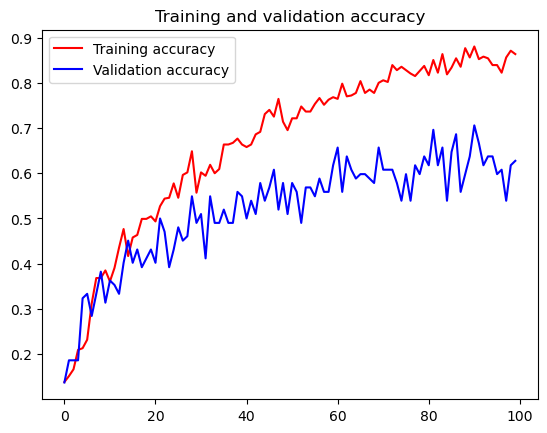

<Figure size 640x480 with 0 Axes>

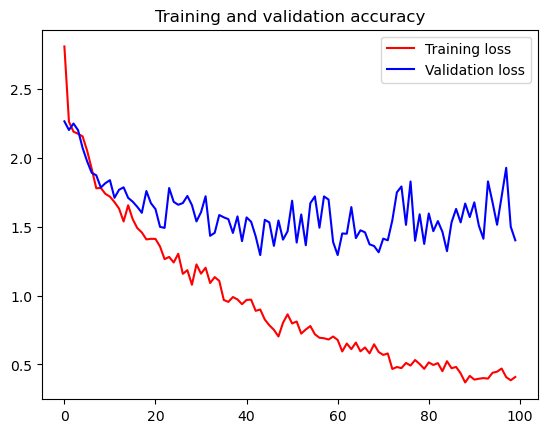

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [15]:
# Save your model in HDF5 format
model.save('wisata_Semarang_v3.h5')

In [16]:
# EXERCISE: Use the tensorflow.js converter to convert the saved Keras model into JSON format.

# YOUR CODE HERE
! tensorflowjs_converter \
    --input_format=keras \
    {'wisata_Semarang_v3.h5'} \
    "./"

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso